In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
tweets=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/11.A_Text Mining/Elon_musk.csv",encoding='Latin-1')
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
# Text processing
tweets=[Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [4]:
#joining the list into a string
tw_text=''.join(tweets)
tw_text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [5]:
import re
no_url_text=re.sub(r'http\S+', '', tw_text)
no_url_text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox!  was the underdoge,\nAll thought he would fail,\nHimself most of all.  @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewest @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true power haha  Any crypto wallet that won\x92t give you your private keys should be avoided at all

In [6]:
#remove punctuation
no_punc_text=no_url_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox  was the underdoge\nAll thought he would fail\nHimself most of all  flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewest UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha  Any crypto wallet that won\x92t give you your private keys should be avoided at all costsfreewalletorg Your app sucksRT SpaceX

In [7]:
#tokenization
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[10:50])

['is', 'nextlevel', 'Have', 'you', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'is', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'moreHappy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would']


In [8]:
#Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
#remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I\x92m', 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'kanyewest', 'UnrealEngine', 'It\x92s', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodlerJoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'highfreewalletorg', 'Thanks', 'fixingfreewalletorg', 'Please', 'unlock', 'accountAstroJordy', 'U0001F923U0001F923This', 'true', 'power', 'Any', 'crypto', 'wallet', 'won\x92t', 'gi

In [10]:
#normalise the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yesblkmdl3', 'rationaletienne', 'adamklotz', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'iporationaletienne', 'adamklotz', 'starlink', 'staggeringly', 'difficult', 'technical', 'amp', 'economic', 'endeavor', 'however', 'adamklotz', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it\x92s', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'amp', 'shippingtobyliiiiiiiiii', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'toocryptoshrikar', 'coindesk', 'tesla', 'danzpalmer', 'u0001f923u0001f923xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stockoptions', 'take', 'table', 'that\x92s', 'you\x92re', 'missingback', 'work', 'gocapybara

In [11]:
#stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', 'yesblkmdl3', 'rationaletienn', 'adamklotz', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'iporationaletienn', 'adamklotz', 'starlink', 'staggeringli', 'difficult', 'technic', 'amp', 'econom', 'endeavor', 'howev', 'adamklotz', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it\x92', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'amp', 'shippingtobyliiiiiiiiii', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'toocryptoshrikar', 'coindesk', 'tesla', 'danzpalm', 'u0001f923u0001f923xpr', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stockopt', 'take', 'tabl', 'that\x92', 'you\x92r', 'missingback', 'work', 'gocapybarasurf', 'mattwallace888', 'doe', 'seem', 'bit', 'highitsallr

In [12]:
nlp=spacy.load('en_core_web_sm')

In [13]:
doc=nlp(' '.join(lower_words))
print(doc)

kunalb11 im alienidaacarmack ray tracing cyberpunk hdr nextlevel have tried itjoerogan spotify great interviewgtera27 doge underestimatedteslacn congratulations tesla china amazing execution last year now next even morehappy new year ox underdoge all thought would fail himself flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocationthe entertaining outcome likelygivedirectly just sent somejust agree clubhouse kanyewest unrealengine its getting realbought dogecoin lil x toddler hodlerjoshmanmode he definitely issues sentencing seems bit highfreewalletorg thanks fixingfreewalletorg please unlock accountastrojordy u0001f923u0001f923this true power any crypto wallet wont give private keys avoided costsfreewalletorg your app sucksrt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission yesblkmdl3 rationaletienne adamklotz once predict cash flow reasonably well starlink iporationaletienne adamklotz 

In [14]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next']


In [15]:
clean_tw=' '.join(lemmas)
print(clean_tw)

kunalb11 im alienidaacarmack ray trace cyberpunk hdr nextlevel have try itjoerogan spotify great interviewgtera27 doge underestimatedteslacn congratulation tesla china amazing execution last year now next even morehappy new year ox underdoge all thought would fail himself flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocationthe entertaining outcome likelygivedirectly just send somejust agree clubhouse kanyewest unrealengine its getting realbought dogecoin lil x toddler hodlerjoshmanmode he definitely issue sentencing seem bit highfreewalletorg thank fixingfreewalletorg please unlock accountastrojordy u0001f923u0001f923this true power any crypto wallet wont give private key avoid costsfreewalletorg your app sucksrt spacex nasa select falcon heavy launch first two element lunar gateway together one mission yesblkmdl3 rationaletienne adamklotz once predict cash flow reasonably well starlink iporationaletienne adamklotz starlink stagge

# Feature Extraction

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
x=vect.fit_transform(lemmas)
x

<13092x4865 sparse matrix of type '<class 'numpy.int64'>'
	with 12914 stored elements in Compressed Sparse Row format>

In [17]:
print(vect.get_feature_names()[10:50])

['11thhour', '12', '122', '13', '130pm', '13ericralph31', '13model', '13teslarati', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '17businessinsider', '18', '1880s', '1b', '1rt', '1st', '1stout', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2020erdayastronaut', '2021', '2024', '2026', '2030', '20k', '210']


# Generate Wordcloud

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

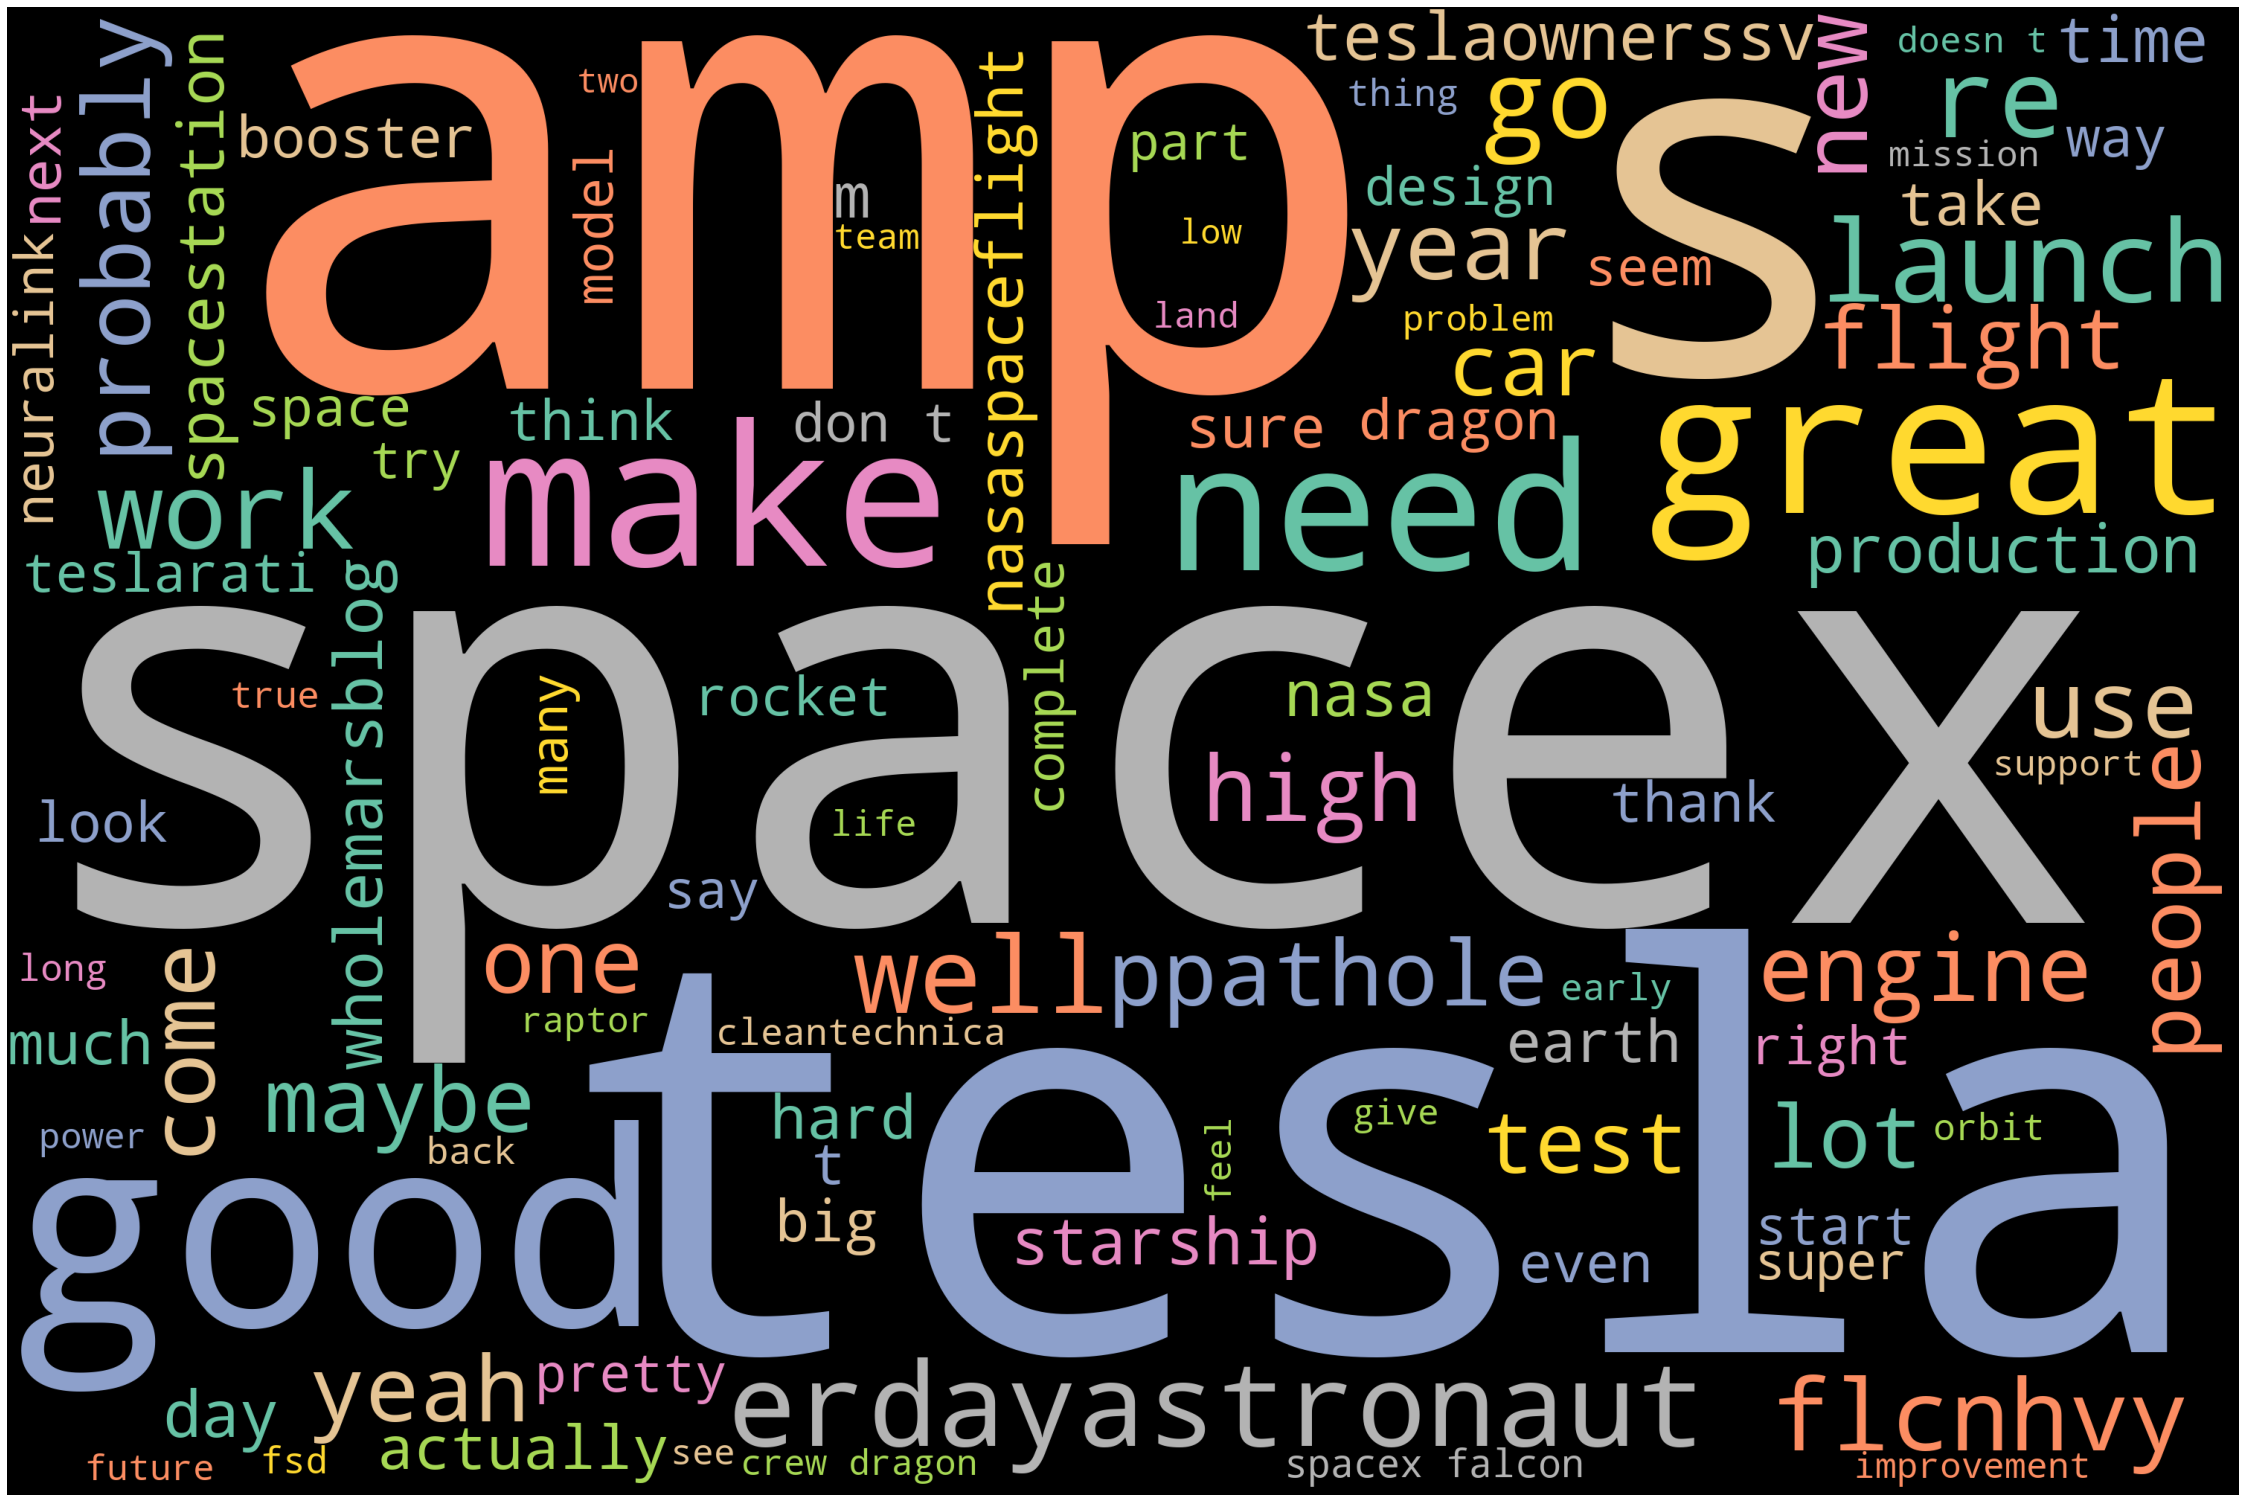

In [19]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(clean_tw)
# Plot
plot_cloud(wordcloud)

# Named Entity Recognition

In [20]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tw
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [21]:
for token in doc_block[10:50]:
    print(token,token.pos_)

itjoerogan NOUN
spotify VERB
great ADJ
interviewgtera27 NOUN
doge PROPN
underestimatedteslacn PROPN
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
morehappy PROPN
new PROPN
year PROPN
ox PROPN
underdoge PROPN
all DET
thought NOUN
would AUX
fail VERB
himself PRON
flcnhvy PROPN
anonyx10 PROPN
haha PROPN
thanks PROPN
flcnhvy PROPN
anonyx10 PROPN
indeed ADV
tweet PROPN
definitely ADV
represent VERB
realworld PROPN
time PROPN
allocationthe PROPN
entertaining ADJ


In [22]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'amp', 'booster', 'ðogecoin', 'video', 'people', 'speak', 'lexfridman', 'cute', 'image', 'doesn\x92t', 'reflect', 'time', 'cost', 'people', 'rain', 'amp', 'let', 'doge', 'rainforestsso', 'come', 'fun', 'simplicity', 'geniusastrogdogg', 'spacex', 'astrojordy', 'decade', 'work', 'look', 'note', 'email', 'yeslesson', 'learnedof', 'earth', 'marstime', 'tell', 'story', 'tesla', 'amp', 'spacextheonion', 'read', 'greatthe', 'hear', 'name', 'yearsgrimezsz', 'dogecakeyolt', 'yeahowenspark', 'surethe', 'thing', 'restaurant', 'get', 'hang', 'currency', 'earthredlineshifter', 'wowrationaletienne', 'teslarati', 'woodhaus2', 'spacex', 'say', 'ship', 'landing', 'burn', 'solution', 'erdayastronaut', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'spacex', 'spacex', 'seem', 'turbopumpfe', 'raptor', 'nasaspaceflight', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'deck', 'dar

In [23]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,tesla,135
1,amp,104
2,make,63
3,spacex,61
4,launch,49
5,go,45
6,need,43
7,get,39
8,work,37
9,year,35


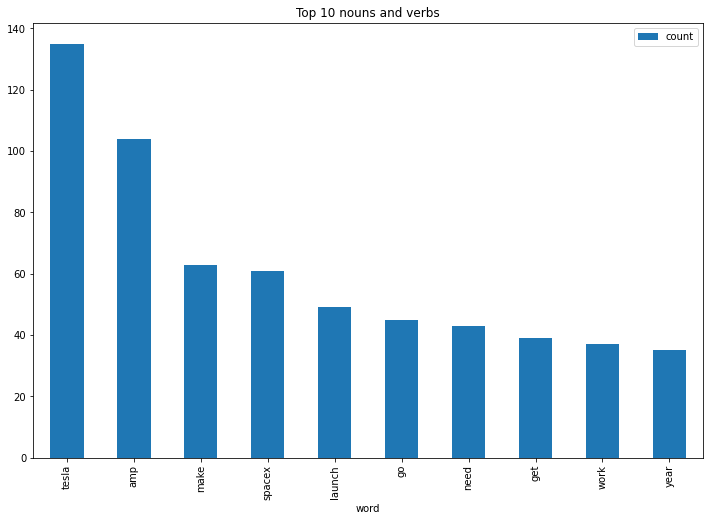

In [24]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Sentiment Analysis

In [25]:
from nltk import tokenize
sentence=tokenize.sent_tokenize(' '.join(tweets))
sentence

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [26]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [27]:
#Emotion Lexicon-Affin
affin=pd.read_csv("E:\SHRADDHA\ipynb/Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [28]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [29]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=1
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [30]:
#manual testing
calculate_sentiment(text='great')

4

In [31]:
#calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      1
1      1
2      4
3      4
4      1
      ..
919    1
920   -3
921    1
922   -1
923    1
Name: sentiment_value, Length: 924, dtype: int64

In [32]:
#how many words are there in a sentence
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [33]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7,61
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-7,60
64,"Also, the road to hell is mostly paved with ba...",-6,11
920,"It may never pay out, as the stock cant b ht...",-3,31
611,"Then static fire, checkouts, static fire, fly ...",-3,12
...,...,...,...
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,14,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,15,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
105,@Erdayastronaut @SpaceX Was also thinking that...,17,94


In [34]:
#sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       2.312771
std        2.647718
min       -7.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       18.000000
Name: sentiment_value, dtype: float64

In [35]:
#negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-1,14
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",-1,40
16,Thats what youre missing.,-1,4
23,https://t.co/UEEocOfcTb The people have spoken...,-2,37
47,Would be better to have small fees than no fee...,-1,48
...,...,...,...
886,This is primarily an electrical/electronic (ch...,-1,69
887,Will those who write the algorithms ever reali...,-2,11
894,No expert installer required.,0,4
920,"It may never pay out, as the stock cant b ht...",-3,31


In [36]:
#positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,1,13
1,Have you tried it?,1,4
2,@joerogan @Spotify Great interview!,4,4
3,@gtera27 Doge is underestimated @teslacn Congr...,4,13
4,Now on to the next for even more!!,1,8
...,...,...,...
917,This is both great &amp; terrifying.,4,6
918,Everything weve ever sensed or thought has be...,4,17
919,"@kenyanwalstreet Not actually a payout, just a...",1,11
921,Details Aug 28.,1,3


In [38]:
#adding index column
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,1,13,0
1,Have you tried it?,1,4,1
2,@joerogan @Spotify Great interview!,4,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,4,13,3
4,Now on to the next for even more!!,1,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",1,11,919
920,"It may never pay out, as the stock cant b ht...",-3,31,920
921,Details Aug 28.,1,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-1,47,922


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

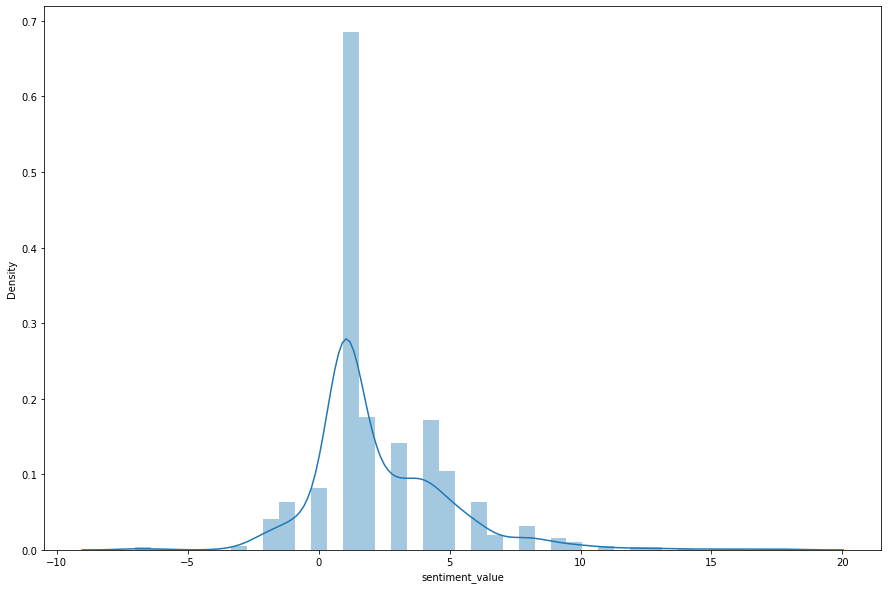

In [39]:
#plotting the sentiment value of the whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

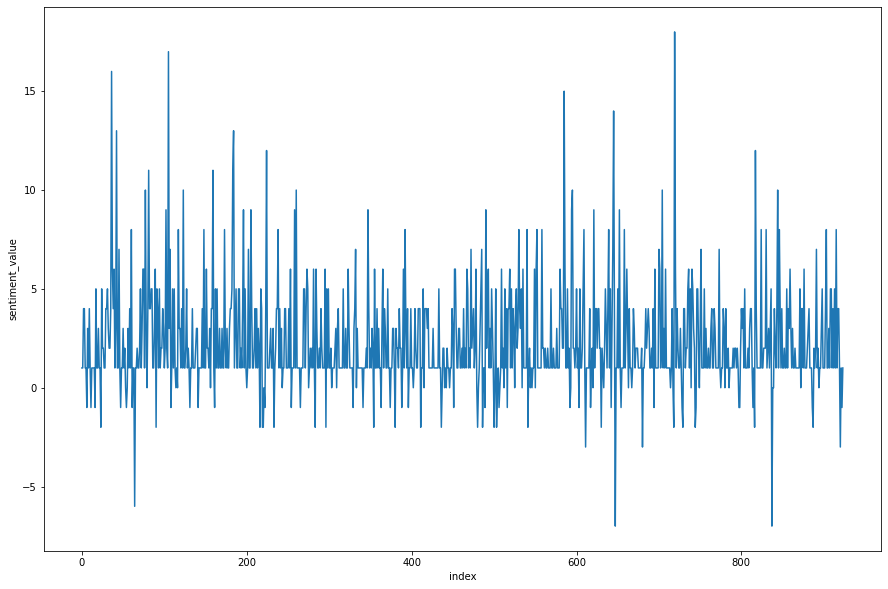

In [40]:
#plotting the line plot for the whole review
plt.figure(figsize=(15,10))
sns.lineplot(x='index',y='sentiment_value',data=sent_df)

<AxesSubplot:title={'center':'sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

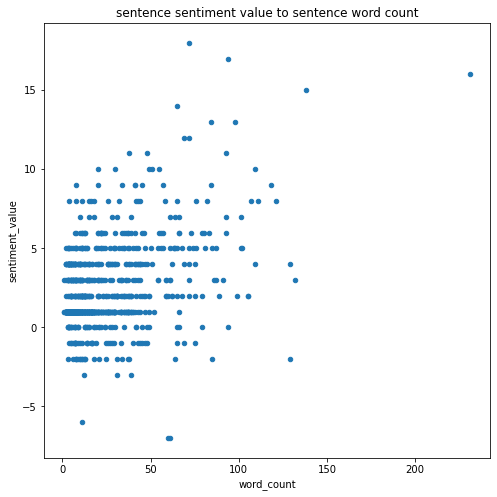

In [41]:
#correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')